<a href="https://colab.research.google.com/github/dennismathewjose/Applied-NLP-Learning-Materials/blob/main/NLP_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Introduction

This homework involves building and analyzing n-grams, training a logistic regression model, and working with
various embedding models. The final deliverable should be a Python Jupyter Notebook with answers to all
questions

#2. Question 1: Language Models & N-Grams (20 Points)

## 2.1 Data Preparation and Cleaning

In [72]:
#Import the necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
import string
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [73]:
#1. Load the raw text data
with open('declaration_of_independence.txt', 'r') as file:
    raw_text = file.read()

In [74]:
#tokenzing the sentences
sentences = sent_tokenize(raw_text)

In [76]:
tokenized_sentences = []
for sentence in sentences:
  #convert the sentence to lowercase
  sentence_lower= sentence.lower()

  #3. remove the punctuations
  translator = str.maketrans('', '', string.punctuation)
  sentence_no_punct = sentence_lower.translate(translator)

  #tokenize into words
  words = word_tokenize(sentence_no_punct)

  #4. remove stopwords
  stop_words = set(stopwords.words('english'))
  filtered_words = [word for word in words if word not in stop_words]

  #6. add the list to tokenzied sentence
  tokenized_sentences.append(filtered_words)

## 2.2 Basic Statistics

In [77]:
#1. Number of sentences
sen_count = len(tokenized_sentences)
print("Number of sentences:", sen_count)

Number of sentences: 34


In [78]:
# Flatten the list of tokenized sentences
all_words = [word for sentence in tokenized_sentences for word in sentence]
print(f"Total number of words: {len(all_words)}")
# Calculate the number of unique words
vocab_size = len(set(all_words))
print(f"Total number of unique words: {vocab_size}")

Total number of words: 645
Total number of unique words: 467


## 2.3. N-gram generation

In [82]:
from nltk.util import ngrams
from collections import Counter

In [140]:
#Constructing the unigram, bigram and trigram from the cleaned text
unigrams = list(ngrams(all_words, 1))
bigrams = list(ngrams(all_words, 2))
trigrams = list(ngrams(all_words, 3))


In [141]:
#count frquencies
unigram_freq = Counter(unigrams)
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

In [142]:
#display the top 3 most common unigrams, bigrams, and trigrams
print("Top 3 most common unigrams:")
for i, (unigram, freq) in enumerate(unigram_freq.most_common(3)):
    print(f"{i+1}. {unigram}: {freq}")

print("\nTop 3 most common bigrams:")
for i, (bigram, freq) in enumerate(bigram_freq.most_common(3)):
    print(f"{i+1}. {bigram}: {freq}")

print("\nTop 3 most common trigrams:")
for i, (trigram, freq) in enumerate(trigram_freq.most_common(3)):
    print(f"{i+1}. {trigram}: {freq}")

Top 3 most common unigrams:
1. ('us',): 11
2. ('people',): 10
3. ('laws',): 9

Top 3 most common bigrams:
1. ('independent', 'states'): 3
2. ('united', 'states'): 2
3. ('states', 'america'): 2

Top 3 most common trigrams:
1. ('united', 'states', 'america'): 2
2. ('free', 'independent', 'states'): 2
3. ('unanimous', 'declaration', 'thirteen'): 1


## 2.4 Bi-gram probabilities

In [159]:
bigram_probabilities = {}
count_w1 = unigram_freq

#computing the probabilities of bigrams
for bigram, count in bigram_freq.items():
  prob_w1_w2 = count / (count_w1[bigram[0],])
  bigram_probabilities[bigram] = prob_w1_w2

In [166]:
#Sorting the bigrams according to their probability
sorted_bigrams = sorted(bigram_probabilities.items(), key=lambda x: x[1],reverse=True)

In [172]:
#display the top 10 probable bigrams
print("Top 10 most probable bigrams:")
for bigram, prob in sorted_bigrams[:10]:
  print(f"P({bigram[1]}|{bigram[0]}) = {prob}")

Top 10 most probable bigrams:
P(declaration|unanimous) = 1.0
P(united|thirteen) = 1.0
P(human|course) = 1.0
P(events|human) = 1.0
P(becomes|events) = 1.0
P(people|one) = 1.0
P(political|dissolve) = 1.0
P(connected|bands) = 1.0
P(another|connected) = 1.0
P(assume|another) = 1.0


## 2.5 Laplace (Add - one) smoothing

In [182]:
smooth_bigram_probabilities = {}
count_w1 = unigram_freq
#computing the probabilities of bigrams
for bigram, count in bigram_freq.items():
  prob_w1_w2 = (count + 1) / (count_w1[bigram[0],] + vocab_size)
  smooth_bigram_probabilities[bigram] = prob_w1_w2

In [183]:
#Sorting the bigrams according to their probability
smooth_sorted_bigrams = sorted(smooth_bigram_probabilities.items(), key=lambda x: x[1],reverse=True)

In [184]:
#display the top 10 probable bigrams after laplace smoothing
print("Top 10 most probable bigrams after smoothing:")
for bigram, prob in smooth_sorted_bigrams[:10]:
  print(f"P({bigram[1]}|{bigram[0]}) = {prob}")

Top 10 most probable bigrams after smoothing:
P(states|independent) = 0.008492569002123142
P(hold|separation) = 0.006396588486140725
P(britain|great) = 0.006396588486140725
P(states|united) = 0.006382978723404255
P(laws|pass) = 0.006382978723404255
P(consent|without) = 0.006382978723404255
P(laws|assent) = 0.006369426751592357
P(independent|free) = 0.006369426751592357
P(us|among) = 0.006355932203389831
P(america|states) = 0.00631578947368421


### Comments and Analysis after smoothing

#### Probability Values:

- Unsmoothed probabilities are often 1.0 for bigrams that appear only once in the dataset.

- Smoothed probabilities are lower because the numerator is adjusted by adding 1, and the denominator is increased by the vocabulary size V.

#### Impact of Smoothing:

- Smoothing reduces the probability of high-frequency bigrams and assigns small probabilities to unseen or rare bigrams.

- This helps handle cases where a bigram does not appear in the training data (zero probability issue).

#### Generalization:

- Smoothed models are more robust and generalize better to unseen data, as they account for the possibility of rare or unseen n-grams.

## 2.6 Theory Questions

### Q1. What are the limitations of n-grams in capturing context

#### Answer
- Fixed Context: Limited to n-1 previous words, misses long-range dependencies.

- Sparsity: Many n-grams are rare or unseen, causing zero probabilities.

- No Semantics: Ignores word meaning (e.g., synonyms).

- Scalability: Large n-grams are computationally expensive.

### Q2. Why is smoothing necessary for language models?

### Answer
- No Zero Probabilities: Ensures unseen n-grams get small probabilities.

- Better Generalization: Handles new or rare word combinations.

- Balances Probabilities: Reduces overconfidence in frequent n-grams.

- Prevents Overfitting: Avoids memorizing training data.

#3. Question 2: Logistic Regression with TF-IDF (60 Points)

In this section, we will use the 20 Newsgroups dataset to apply Logistic Regression, leveraging TF-IDF.
we may use a library whenever possible to train/test/split, perform modeling, develop embeddings, and evaluate
the model. we do not need to implement anything from scratch.

##3.1 Data Loading and Exploration

In [185]:
#importing the data and nltk libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# Download NLTK resources
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [186]:
#1: Load the dataset
categories = ['sci.space', 'rec.sport.baseball']  # Example categories
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

In [191]:
#2: Preprocess the documents
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [192]:
#creating a function to preprocess the data
def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Apply stemming
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

# Preprocess all documents
preprocessed_docs = [preprocess(doc) for doc in newsgroups.data]

In [193]:
#3: Print basic statistics
print(f"Number of samples (documents): {len(preprocessed_docs)}")
print("\nExample documents:")
for i, doc in enumerate(preprocessed_docs[:3]):  # Print first 3 documents
    print(f"Document {i+1}:\n{doc}\n")

Number of samples (documents): 1981

Example documents:
Document 1:
realli *that* much inform him? really? know. tell me. percentag player reach exceed mle' *in rooki season*? we'r talk 1993, know. purpose, maybe. offerman spent 1992 get acclimated, will. dodger team paid big price season. perhap reap benefit road. realli think would done compet pennant? stat-head, i'm amaz put credenc spring training. notic got 10 (!) hit of, go tell make difference? wait minute. miss someth here. first, forget keith mitchell. say kid move aa aaa improv would better make direct leap majors? player well aa improv aaa, sign mayb belong bigs? now, keith mitchell. recal (no stat book handi - surprise!) jump aa atlanta 1991. well return minors, well all. career jeopardy. fit point. good mle' aa. move right big club. he' one step away trade move baseball. duh. well, i'v cast lot. certainli may understand better good lopez is. may overvalu experience. neither one us run basebal team. -- beastmast

Document 2

## 3.2 TF-IDF Feature Extraction

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [195]:
#1: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    preprocessed_docs, newsgroups.target, test_size=0.2, random_state=42
)

In [196]:
#2: Transform text data into TF-IDF features
#TfidfVectorizer to transform the text data into TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train) #fit and transform the training data
X_test_tfidf = tfidf_vectorizer.transform(X_test) #Transforming the training data

In [197]:
#3: Print the shape of the TF-IDF feature matrix
print(f"TF-IDF Training Data Shape: {X_train_tfidf.shape}")  # (num_samples, num_features)
print(f"TF-IDF Test Data Shape: {X_test_tfidf.shape}")

TF-IDF Training Data Shape: (1584, 18275)
TF-IDF Test Data Shape: (397, 18275)


## 3.3 Training and Evaluation

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [203]:
#1: Train on your TF-IDF features - Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [204]:
#2: Predict on the test set
y_pred = model.predict(X_test_tfidf)

In [205]:
#2: ompute the accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9597
Precision: 0.9600
Recall: 0.9597
F1 Score: 0.9596


In [206]:
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))


Classification Report:
                    precision    recall  f1-score   support

rec.sport.baseball       0.97      0.94      0.96       186
         sci.space       0.95      0.98      0.96       211

          accuracy                           0.96       397
         macro avg       0.96      0.96      0.96       397
      weighted avg       0.96      0.96      0.96       397



### Analysis of result

The Logistic Regression model with TF-IDF features performs exceptionally well, achieving an accuracy of 95.97%. Key observations include:

#### High Performance Across Metrics:

- Precision (96.00%): The model is highly reliable, with 96% of its predictions being correct.

- Recall (95.97%): It identifies 96% of the actual positives, showing strong coverage.

- F1 Score (95.96%): The balance between precision and recall is excellent.

#### Category-Wise Performance:

- rec.sport.baseball: Slightly higher precision (97%) but lower recall (94%). This suggests the model is more confident in its predictions for this category but misses a few actual rec.sport.baseball documents.

- sci.space: Slightly lower precision (95%) but higher recall (98%). The model is better at identifying sci.space documents but is slightly less precise.

#### No Hard-to-Predict Category:

- Both categories perform similarly, with no significant differences in metrics. This indicates that the TF-IDF features effectively capture the distinguishing characteristics of each category.

#### Notable Observations:

- The slightly lower recall for rec.sport.baseball suggests that some sports-related documents might be harder to classify, possibly due to overlapping vocabulary or ambiguous phrasing.

- The high recall for sci.space indicates that the model is particularly effective at identifying space-related documents.

# 4. Question 3: t-SNE Visualization using Word2Vec (20 Points)

Note: In this section, we will only focus on Word2Vec embeddings and their t-SNE visualization. We do not
need to train or evaluate a Logistic Regression model on these embeddings

## 4.1 Data Subset Selection

In [209]:
#importing the dataset (the data was already imported for the previous task)
from sklearn.datasets import fetch_20newsgroups

In [ ]:
#1. Selecting two categories from the 20 Newsgroups dataset for a clear binary separation
categories = ['sci.space', 'rec.sport.baseball']

#2. Filtering the dataset to include only the documents from these two categories
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

In [211]:
#Verifying the dataset
print(f"Number of samples (documents): {len(newsgroups.data)}")
print(f"categories {newsgroups.target_names}")
print(f"First document \n{newsgroups.data[0]}")

Number of samples (documents): 1981
categories ['rec.sport.baseball', 'sci.space']
First document 

Do you really have *that* much information on him?  Really?


I don't know.  You tell me.  What percentage of players reach or 
exceed their MLE's *in their rookie season*?  We're talking about
1993, you know.


If that were your purpose, maybe.  Offerman spent 1992 getting 
acclimated, if you will.  The Dodgers as a team paid a big price
that season.  Perhaps they will reap the benefits down the road.
Do you really think they would have done what they did if they
were competing for a pennant?


For a stat-head, I'm amazed that you put any credence in spring
training.  Did you notice who he got those 10 (!) hits off of, or
are you going to tell me that it doesn't make a difference?


Wait a minute.  I missed something here.  First, forget Keith
Mitchell.  Are you saying that a kid who moves from AA to AAA
and then does not improve would have been better off making a
direct leap to the ma

## 4.2 Word2Vec model and Embedding extraction

In [212]:
#use gensim to load a pre-trained model
import gensim.downloader as api
from nltk.tokenize import word_tokenize
import numpy as np

#1. Using genism to load pre-trained model
print("Loading pre-trained Word2Vec model...")
word2vec_model = api.load("word2vec-google-news-300") #300 dimensional embeddings
print("Model loaded successfully.")

Loading pre-trained Word2Vec model...
[==================================================] 100.0% 1662.8/1662.8MB downloaded
Model loaded successfully.


In [213]:
#2. Tokenize and Cleaning the data
def tokenize_text(document):
    #2.1 Tokenizing each document
    tokens =  word_tokenize(document.lower())

    #2.2 Remove tokens not in the Word2Vec model’s vocabulary
    tokens =  [word for word in tokens if word in word2vec_model.key_to_index]
    return tokens

tokenized_documents = [tokenize_text(doc) for doc in newsgroups.data]

In [214]:
#3. For each document, average the Word2Vec embeddings of all tokens in that document to form a singlevector.
def document_embedding(tokens):
  #Get embeddings for all tokens in the document
  embeddings = [word2vec_model[word] for word in tokens if word in word2vec_model]
  if len(embeddings) == 0:
    return np.zeros(word2vec_model.vector_size)
  else:
    return np.mean(embeddings, axis=0)

#Construct a feature matrix of shape (num documents, embedding dimension)
embedding_dim = word2vec_model.vector_size
embedding_matrix = np.array([document_embedding(tokens) for tokens in tokenized_documents])

#print the feature matrix shape
print(f"Feature matrix shape: {embedding_matrix.shape}")

Feature matrix shape: (1981, 300)


## 4.3 t-SNE Evaluation

In [215]:
#1. Using sklearn.manifold.TSNE to reduce the document embeddings to 2D space
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(embedding_matrix)

<ipython-input-225-a20a5c100ec2>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=colors, cmap='viridis', alpha=0.5)


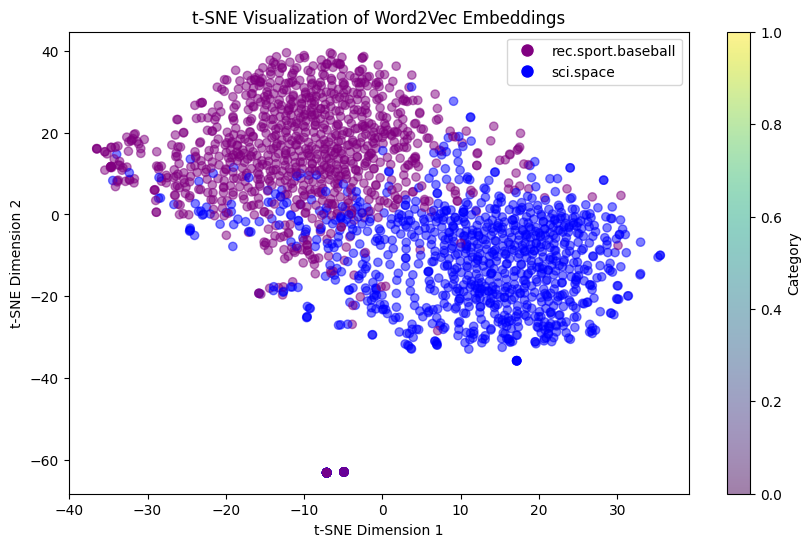

In [225]:
#2. plotting the results in 2D
plt.figure(figsize=(10, 6))
colors = ['purple' if target == 0 else 'blue' for target in newsgroups.target]
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=colors, cmap='viridis', alpha=0.5)
plt.title('t-SNE Visualization of Word2Vec Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Category')
plt.legend(handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label=newsgroups.target_names[0]),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=newsgroups.target_names[1])
])
plt.show()

### 3. Analysis
- The t-SNE visualization shows two distinct clusters, with purple points (rec.sport.baseball) and blue points (sci.space) mostly separated. This indicates that the Word2Vec embeddings effectively capture the differences between the two categories. However, there is some overlap in the center of the plot, suggesting that a few documents share vocabulary or themes common to both categories. Overall, the separation is strong, demonstrating the utility of Word2Vec embeddings for distinguishing between these topics.